In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import statistics
from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [2]:
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]]
df.head()

100%|██████████| 4.81k/4.81k [00:09<00:00, 527KB/s]


,userId,movieId,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [3]:
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

scaler = StandardScaler()
df[["userId_enc", "movieId_enc"]] = scaler.fit_transform(df[["userId_enc", "movieId_enc"]])

df.head()

,userId,movieId,rating,userId_enc,movieId_enc
0,196,242,3.0,-0.999519,-0.554812
1,186,302,3.0,-1.037026,-0.373432
2,22,377,1.0,-1.652150,-0.146707
3,244,51,2.0,-0.819482,-1.132206
4,166,346,1.0,-1.112041,-0.240420


In [12]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df[["userId_enc", "movieId_enc"]]
y = df["rating"]

In [15]:
# Chay 10 lan cho k = 5
rmse_l = []
mae_l = []
mse_l = []

for i in range(10):
    combined = list(zip(X.values, y.values))
    random.shuffle(combined)
    dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)
    # X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, random_state=125)
    model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
    model.fit(X_Train, Y_Train)
    y_pred = model.predict(X_Test)
        
    mse = mean_squared_error(Y_Test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_Test, y_pred)
    
    mse_l.append(mse)
    rmse_l.append(rmse)
    mae_l.append(mae)
    
    print(f"Lan {i+1}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | MSE = {mse:.4f}")

mean_rmse = np.mean(rmse_l)
mean_mae = np.mean(mae_l)
mean_mse = np.mean(mse_l)

print(f"\nTrung binh sau 10 lan:")
print(f"RMSE trung binh: {mean_rmse:.4f}")
print(f"MAE trung binh: {mean_mae:.4f}")
print(f"MSE trung binh: {mean_mse:.4f}")

Lan 1: RMSE = 1.1379 | MAE = 0.9079 | MSE = 1.2948
Lan 2: RMSE = 1.1244 | MAE = 0.8966 | MSE = 1.2642
Lan 3: RMSE = 1.1337 | MAE = 0.9016 | MSE = 1.2852
Lan 4: RMSE = 1.1348 | MAE = 0.9036 | MSE = 1.2878
Lan 5: RMSE = 1.1311 | MAE = 0.9017 | MSE = 1.2793
Lan 6: RMSE = 1.1274 | MAE = 0.8970 | MSE = 1.2711
Lan 7: RMSE = 1.1372 | MAE = 0.9074 | MSE = 1.2932
Lan 8: RMSE = 1.1325 | MAE = 0.9019 | MSE = 1.2826
Lan 9: RMSE = 1.1302 | MAE = 0.9007 | MSE = 1.2774
Lan 10: RMSE = 1.1264 | MAE = 0.8985 | MSE = 1.2687

Trung binh sau 10 lan:
RMSE trung binh: 1.1316
MAE trung binh: 0.9017
MSE trung binh: 1.2804


In [ ]:
import time
for k_neighbor in range(1, 21):
    time_train = []
    time_test = []
    rmse_list = []
    mae_list = []
    mse_list = []
    for each in range(1, 11):  # Chạy 10 lần thử nghiệm
        combined = list(zip(X.values, y.values))
        # combined = list(zip(X, y))
        random.shuffle(combined)
        dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)

        # Huấn luyện mô hình KNN
        st = time.time()
        model = KNeighborsRegressor(n_neighbors=k_neighbor)
        model.fit(X_Train, Y_Train)
        et = time.time() - st
        time_train.append(et)

        # Dự đoán và tính toán thời gian
        st = time.time()
        Y_Pred = model.predict(X_Test)
        et = time.time() - st
        time_test.append(et)

      
        knn_mse = mean_squared_error(Y_Test, Y_Pred)
        mse_list.append(knn_mse)
        knn_rmse = np.sqrt(knn_mse)
        rmse_list.append(knn_rmse)
        knn_mae = mean_absolute_error(Y_Test, Y_Pred)
        mae_list.append(knn_mae)
        # print(f"MSE cho k={k_neighbor} là: {knn_mse}")

    # Tính trung bình thời gian train, test và MSE
    Ketqua_timeTrain = statistics.mean(time_train)
    Ketqua_timeTest = statistics.mean(time_test)

    Ketqua_mse = statistics.mean(mse_list)
    Ketqua_rmse = statistics.mean(rmse_list)
    Ketqua_mae = statistics.mean(mae_list)
    
    print(f"k = {k_neighbor}")
    print(f"Train Time: {Ketqua_timeTrain}")
    print(f"Test Time: {Ketqua_timeTest}")
    print(f"Trung binh: RMSE = {Ketqua_rmse:.4f} | MAE = {Ketqua_mae:.4f} | MSE = {Ketqua_mse:.4f}")



k = 1
Train Time: 0.23380858898162843
Test Time: 0.24398307800292968
Trung binh: RMSE = 1.4178 | MAE = 1.0562 | MSE = 2.0103
k = 2
Train Time: 0.27766056060791017
Test Time: 0.28414344787597656
Trung binh: RMSE = 1.2436 | MAE = 0.9679 | MSE = 1.5465
k = 3
Train Time: 0.22844972610473632
Test Time: 0.2659496784210205
Trung binh: RMSE = 1.1802 | MAE = 0.9321 | MSE = 1.3930
k = 4
Train Time: 0.3592471361160278
Test Time: 0.4889672040939331
Trung binh: RMSE = 1.1491 | MAE = 0.9124 | MSE = 1.3205
k = 5
Train Time: 0.3618135452270508
Test Time: 0.5712291717529296
Trung binh: RMSE = 1.1324 | MAE = 0.9027 | MSE = 1.2824
k = 6
Train Time: 0.15540966987609864
Test Time: 0.23817477226257325
Trung binh: RMSE = 1.1177 | MAE = 0.8930 | MSE = 1.2493
k = 7
Train Time: 0.1617298126220703
Test Time: 0.20911862850189208
Trung binh: RMSE = 1.1107 | MAE = 0.8882 | MSE = 1.2337
k = 8
Train Time: 0.1661311149597168
Test Time: 0.22985389232635497
Trung binh: RMSE = 1.1057 | MAE = 0.8859 | MSE = 1.2227
k = 9
T

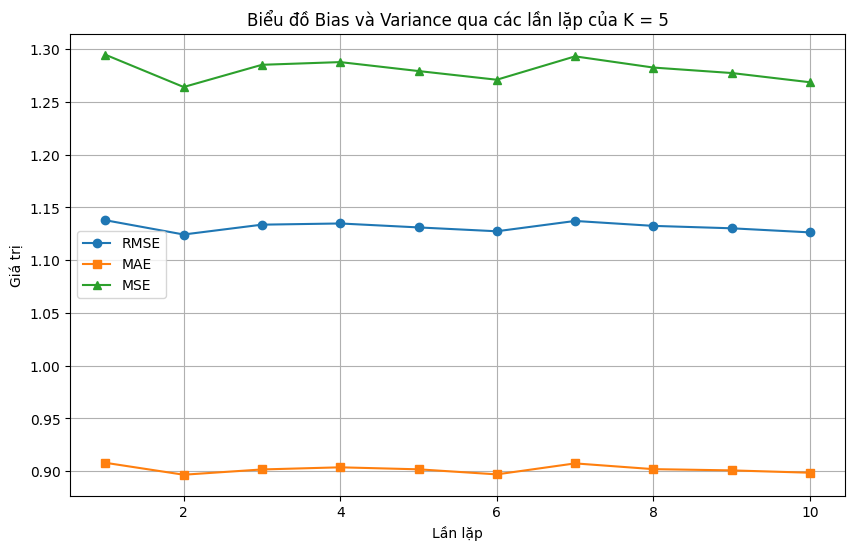

In [16]:
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_l, marker='o', label='RMSE')
plt.plot(iterations, mae_l, marker='s', label='MAE')
plt.plot(iterations, mse_l, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp của K = 5')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
